In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import csv
import pandas as pd
from pathlib import Path



In [11]:
img = image.load_img("train/Bead/100.PNG")


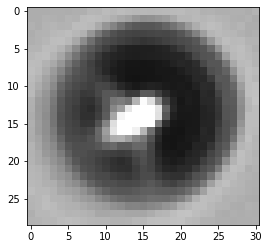

In [12]:
plt.imshow(img)

In [5]:
cv2.imread("train/Bead/100.PNG").shape

(29, 31, 3)

In [6]:
"""image = cv2.imread('train/Not_Bead/1.PNG')
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]


cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area=cv2.contourArea(c)
    if area >200:
        cv2.drawContours(thresh,[c], -1,(0,0,0),-1)
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('{}.png'.format(ROI_number), ROI)
        cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
        ROI_number += 1

#cv2.imshow('thresh', thresh)
cv2.imshow('copy', copy)
cv2.waitKey()"""

"image = cv2.imread('train/Not_Bead/1.PNG')\ncopy = image.copy()\ngray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\nthresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]\n\n\ncnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\ncnts = cnts[0] if len(cnts) == 2 else cnts[1]\n\nROI_number = 0\nfor c in cnts:\n    area=cv2.contourArea(c)\n    if area >200:\n        cv2.drawContours(thresh,[c], -1,(0,0,0),-1)\n        x,y,w,h = cv2.boundingRect(c)\n        ROI = image[y:y+h, x:x+w]\n        cv2.imwrite('{}.png'.format(ROI_number), ROI)\n        cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)\n        ROI_number += 1\n\n#cv2.imshow('thresh', thresh)\ncv2.imshow('copy', copy)\ncv2.waitKey()"

In [13]:
train=ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [17]:
train_dataset =train.flow_from_directory('train/',
                                         target_size=(50,50),
                                         batch_size=3,
                                         class_mode ="binary")
validation_dataset=train.flow_from_directory('validate/',
                                        target_size=(50,50),
                                        batch_size=3,
                                        class_mode="binary")                                  

Found 750 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [9]:
os.rmdir(".ipynb_checkpoints")
dir= os.listdir("Untitled Folder/")
print(dir)


OSError: [WinError 145] The directory is not empty: '.ipynb_checkpoints'

In [18]:
train_dataset.class_indices

{'Bead': 0, 'Not_Bead': 1}

In [19]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
 model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu', input_shape=(50,50,3)),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      #
                                      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      #
                                      tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                      tf.keras.layers.MaxPool2D(2,2),
                                       #  
                                      tf.keras.layers.Flatten(),
                                    ##
                                      tf.keras.layers.Dense(512,activation="relu"),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                     ])

In [21]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

C:\Users\Abdul Butt\conda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [22]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
5/5 [==============================] - 4s 510ms/step - loss: 0.8374 - accuracy: 0.6667 - val_loss: 0.3776 - val_accuracy: 0.8734
Epoch 2/30
5/5 [==============================] - 1s 310ms/step - loss: 0.3831 - accuracy: 0.9333 - val_loss: 1.0924 - val_accuracy: 0.2062
Epoch 3/30
5/5 [==============================] - 1s 344ms/step - loss: 0.6443 - accuracy: 0.6000 - val_loss: 0.3713 - val_accuracy: 0.8281
Epoch 4/30
5/5 [==============================] - 1s 312ms/step - loss: 0.1445 - accuracy: 0.9333 - val_loss: 0.4887 - val_accuracy: 0.8266
Epoch 5/30
5/5 [==============================] - 1s 316ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.7472 - val_accuracy: 0.8266
Epoch 6/30
5/5 [==============================] - 2s 392ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.8678 - val_accuracy: 0.8266
Epoch 7/30
5/5 [==============================] - 1s 297ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.9383 - val_accuracy: 0.8266
Epoch 8/30
5/5 [====

In [45]:
dir_path="test/Not_bead"
outputs = []
for i in os.listdir(dir_path ):
    img=image.load_img(dir_path+'//'+i, target_size=(50,50) )
    #plt.imshow(img)
    #plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val= model.predict(images)
    outputs.append(val)
    
    #print(val)
    #print(type(val))
    #a=np.array(val)
    #df=pd.DataFrame({"data": [a]})

    
    if val == 0:
        pass#print("bead")
    else:
        pass#print("not bead")
    
with open("Data.csv", 'w') as f:
    for i in outputs:    

    

        print( i, end=",", file=f)

In [ ]:
cwd = os.getcwd()
files=os.listdir(cwd)
print(cwd,files)

In [37]:
arr = [2,4,5,7,9]
arr_2d = [[1,2],[3,4]]
 
#printing the array
print("The Array is : ")
for i in arr:
    print(i, end = ' ')

The Array is : 
2 4 5 7 9 